In [ ]:
import torch
import fastai
print(torch.__version__)
print(fastai.__version__)

2.0.1+cu118
2.7.12


In [ ]:
torch.cuda.is_available()

True

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets


path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()


dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid = 0.2, seed = 42,
    label_func=is_cat, item_tfms= Resize(224)
)


learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(2)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.177021,0.028695,0.991204,01:09


epoch,train_loss,valid_loss,accuracy,time
0,0.071414,0.027408,0.992558,00:58
1,0.029188,0.015044,0.993234,00:59


In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi? True
Aniqlilig ehtimolligi1.000


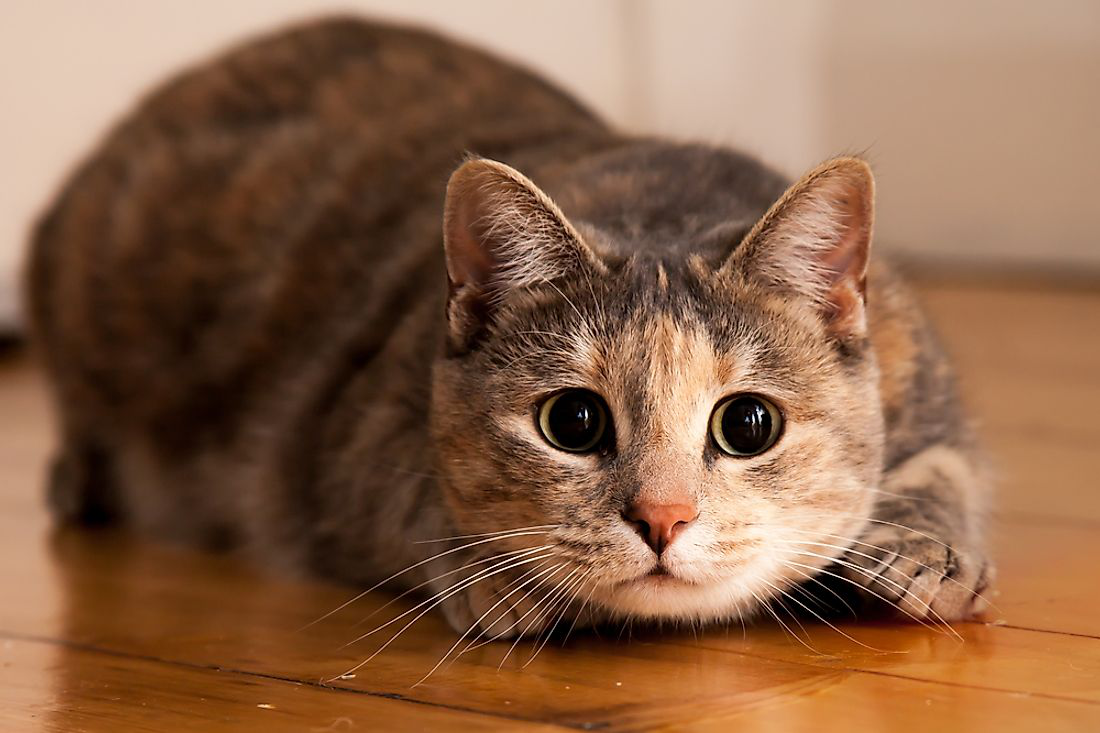

In [ ]:
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)
print(f'Это кошка? {pred}')
print(f'Точность {prob[1].item():.3f}')
img